In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('smartphone_ads.csv')

In [3]:
data.head()

Youtube_Ads  google_Ads  FB_Ads  Smartphone_Sales
0       355.29        91.3    94.8              2260
1       169.69        92.8    70.7              1090
2       142.39        99.4    94.9              1250
3       276.69        94.8    84.1              1700
4       305.99        64.3    84.0              1840

<Figure size 1800x576 with 0 Axes>

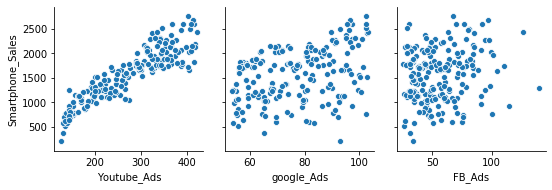

In [4]:
plt.figure(figsize = (25,8))
sns.pairplot(data = data, x_vars = ['Youtube_Ads', 'google_Ads', 'FB_Ads'] , y_vars = 'Smartphone_Sales' )
plt.show()

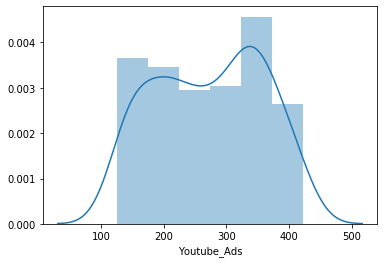

In [5]:
sns.distplot(data['Youtube_Ads'])

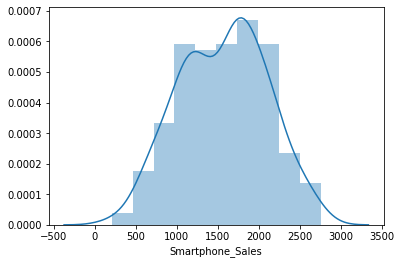

In [6]:
sns.distplot(data['Smartphone_Sales'])

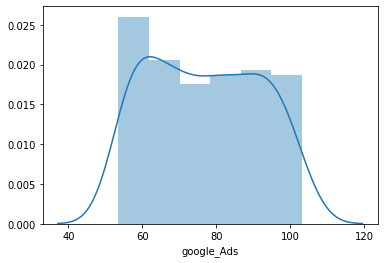

In [7]:
sns.distplot(data['google_Ads'])

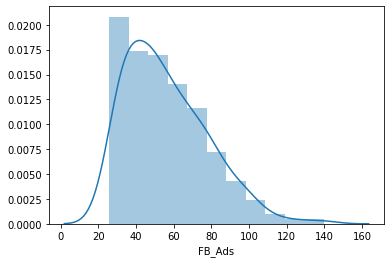

In [23]:
sns.distplot(data['FB_Ads'])

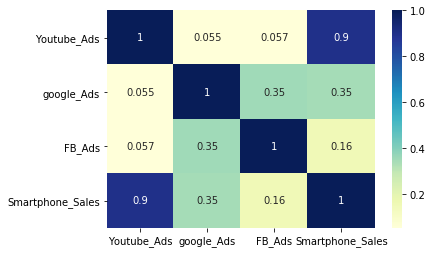

In [8]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [10]:
X = data['Youtube_Ads']
Y = data['Smartphone_Sales']

# split data into test and train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [13]:
X_train.describe()

count    140.000000
mean     272.901429
std       92.866185
min      125.890000
25%      191.890000
50%      270.290000
75%      355.790000
max      421.590000
Name: Youtube_Ads, dtype: float64

In [21]:
X_test.describe()

count     60.000000
mean     270.671667
std       67.379066
min      132.990000
25%      214.265000
50%      289.190000
75%      328.765000
max      373.990000
Name: Youtube_Ads, dtype: float64

# building a modal
## with statsmodal

In [24]:
import statsmodels.api as sm

In [27]:
#adding constant
X_train_sm = sm.add_constant(X_train)
X_train

74     338.59
3      276.69
185    330.19
26     268.09
90     259.49
        ...  
87     235.89
103    313.09
67     264.49
24     187.49
8      133.79
Name: Youtube_Ads, Length: 140, dtype: float64

In [26]:
X_train_sm

const  Youtube_Ads
74     1.0       338.59
3      1.0       276.69
185    1.0       330.19
26     1.0       268.09
90     1.0       259.49
..     ...          ...
87     1.0       235.89
103    1.0       313.09
67     1.0       264.49
24     1.0       187.49
8      1.0       133.79

[140 rows x 2 columns]

In [28]:
lr = sm.OLS(Y_train, X_train_sm).fit()

In [36]:
print(lr.params)

const          62.010039
Youtube_Ads     5.454575
dtype: float64


### y = mx + c 
### hear m = 5.454575 and c  = 62.010039

In [33]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       Smartphone_Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           1.52e-52
Time:                        16:07:40   Log-Likelihood:                -965.85
No. Observations:                 140   AIC:                             1936.
Df Residuals:                     138   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.0100     63.580      0.975      

## here what is requried for good model
### R-squared  near to 1 
### prob ( F-statistic ) near to 0
### p near to 0


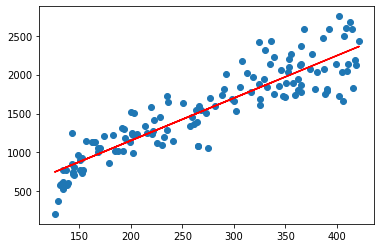

In [42]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, 62.0100 + 5.4546*X_train, 'r')
plt.show()

In [44]:
Y_train_p = lr.predict(X_train_sm)
res = Y_train - Y_train_p

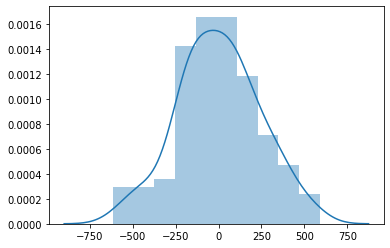

In [46]:
sns.distplot(res)
plt.show()

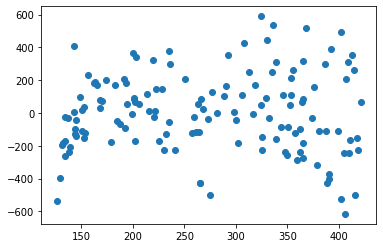

In [49]:
plt.scatter(X_train,res)
plt.show()
# no pattern between X_train and error

In [51]:
X_test_sm = sm.add_constant(X_test)
Y_P = lr.predict(X_test_sm)

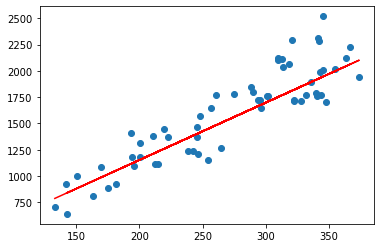

In [57]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_P, 'r')
plt.show()